# Evaluation on Kang Data

In [28]:
import pathlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotnine as p9
import plotnine as p9
import numpy as np

In [29]:
FPR = 0.2

In [30]:
# Reference values
scores_expimap = {
    "aupr": 0.059676,
    "precision": 0.044995,
    "recall": 0.297059,
    "f1": 0.077975,
    "tp": 5.000000,
    "tn": 193.000000,
    "rmse": 0.531548,
    "fp": 0.000000,
    "fn": 1.000000,
}
scores_spectra = {
    "aupr": 0.396300,
    "precision": 0.422500,
    "recall": 0.556848,
    "f1": 0.446103,
    "tp": 25.000000,
    "tn": 169.000000,
    "rmse": 0.741474,
    "fp": 0.000000,
    "fn": 6.000000,
}

In [38]:
# Load files that contain silhouettes and concatenate them
files = [
    x
    for x in pathlib.Path("/data/m015k/prismo/benchmark/prismo/").rglob("*.csv")
    if "knn" in str(x)
]
df_sh = pd.concat([pd.read_csv(x) for x in files])
# Rename fraction to score
df_sh = df_sh.rename(columns={"fraction": "score"})
# df_sh = df_sh.sort_values(by="score", ascending=False).head(10)
df_sh

,model,score,i,j,lr,early_stopper_patience,max_epochs,prior_penalty,n_factors,genefilter,fpr,fnr,min_count
0,prismo_0.01_1000_10000_0.001_3_std_0.0_0.0_40_1,0.978388,Factor 3,Factor 2,0.010,1000,10000,0.001,3,std,0.0,0.0,40
1,prismo_0.01_1000_10000_0.001_3_std_0.0_0.0_40_1,0.972915,REACTOME_INTERFERON_SIGNALING,Factor 2,0.010,1000,10000,0.001,3,std,0.0,0.0,40
2,prismo_0.01_1000_10000_0.001_3_std_0.0_0.0_40_1,0.940962,Factor 1,Factor 2,0.010,1000,10000,0.001,3,std,0.0,0.0,40
3,prismo_0.01_1000_10000_0.001_3_std_0.0_0.0_40_1,0.934878,REACTOME_INTERFERON_ALPHA_BETA_SIGNALING,Factor 2,0.010,1000,10000,0.001,3,std,0.0,0.0,40
4,prismo_0.01_1000_10000_0.001_3_std_0.0_0.0_40_1,0.924433,Factor 2,REACTOME_TOLL_LIKE_RECEPTOR_CASCADES,0.010,1000,10000,0.001,3,std,0.0,0.0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,prismo_0.005_1000_15000_0.001_2_std_0.0_0.0_40_1,0.557130,REACTOME_HIV_LIFE_CYCLE,REACTOME_C_TYPE_LECTIN_RECEPTORS_CLRS,0.005,1000,15000,0.001,2,std,0.0,0.0,40
116,prismo_0.005_1000_15000_0.001_2_std_0.0_0.0_40_1,0.555090,REACTOME_HIV_LIFE_CYCLE,REACTOME_THE_CITRIC_ACID_TCA_CYCLE_AND_RESPIRA...,0.005,1000,15000,0.001,2,std,0.0,0.0,40
117,prismo_0.005_1000_15000_0.001_2_std_0.0_0.0_40_1,0.554213,REACTOME_C_TYPE_LECTIN_RECEPTORS_CLRS,REACTOME_C_TYPE_LECTIN_RECEPTORS_CLRS,0.005,1000,15000,0.001,2,std,0.0,0.0,40
118,prismo_0.005_1000_15000_0.001_2_std_0.0_0.0_40_1,0.553587,REACTOME_EUKARYOTIC_TRANSLATION_ELONGATION,REACTOME_EUKARYOTIC_TRANSLATION_ELONGATION,0.005,1000,15000,0.001,2,std,0.0,0.0,40


# Silhouette Scores

In [39]:
files = [
    x
    for x in pathlib.Path("/data/m015k/prismo/benchmark/prismo/").rglob("*.csv")
    if "score" in str(x)
]
df = pd.concat([pd.read_csv(x) for x in files])

# Groupby model and compute median of score, keep all other columns as well
df = (
    df.groupby(["model", "metric"])
    .agg({"score": "median", **{x: "first" for x in df.columns if x != "score"}})
    .reset_index(drop=True)
)
df = df.loc[df["fpr"] == FPR]
df

,score,model,metric,lr,early_stopper_patience,max_epochs,prior_penalty,n_factors,genefilter,fpr,fnr,min_count
27,0.823710,prismo_0.001_1000_10000_0.001_0_std_0.2_0.2_40_1,aupr,0.001,1000,10000,0.001,0,std,0.2,0.2,40
28,0.726694,prismo_0.001_1000_10000_0.001_0_std_0.2_0.2_40_1,f1,0.001,1000,10000,0.001,0,std,0.2,0.2,40
29,0.000000,prismo_0.001_1000_10000_0.001_0_std_0.2_0.2_40_1,fn,0.001,1000,10000,0.001,0,std,0.2,0.2,40
30,11.000000,prismo_0.001_1000_10000_0.001_0_std_0.2_0.2_40_1,fp,0.001,1000,10000,0.001,0,std,0.2,0.2,40
31,0.804400,prismo_0.001_1000_10000_0.001_0_std_0.2_0.2_40_1,precision,0.001,1000,10000,0.001,0,std,0.2,0.2,40
...,...,...,...,...,...,...,...,...,...,...,...,...
5395,0.764171,prismo_0.02_200_5000_0.001_5_std_0.2_0.2_40_1,precision,0.020,200,5000,0.001,5,std,0.2,0.2,40
5396,0.814871,prismo_0.02_200_5000_0.001_5_std_0.2_0.2_40_1,recall,0.020,200,5000,0.001,5,std,0.2,0.2,40
5397,0.551718,prismo_0.02_200_5000_0.001_5_std_0.2_0.2_40_1,rmse,0.020,200,5000,0.001,5,std,0.2,0.2,40
5398,152.000000,prismo_0.02_200_5000_0.001_5_std_0.2_0.2_40_1,tn,0.020,200,5000,0.001,5,std,0.2,0.2,40


In [40]:
# Merge expimap and spectra scores
# df = pd.merge(
#     df,
#     pd.DataFrame([scores_expimap, scores_spectra], index=["expimap", "spectra"])
#     .T.reset_index()
#     .rename(columns={"index": "metric"}),
#     left_on="metric",
#     right_on="metric",
# )

# Turn metric values into columns and keep all other columns
df = pd.merge(
    df.pivot(index="model", columns="metric", values="score").reset_index(),
    df.drop(columns="score").drop_duplicates(),
    left_on="model",
    right_on="model",
)

df = pd.merge(
    df,
    df_sh[
        [
            "score",
            "lr",
            "early_stopper_patience",
            "max_epochs",
            "prior_penalty",
            "n_factors",
            "genefilter",
            "min_count",
            "i",
            "j",
        ]
    ],
    left_on=[
        "lr",
        "early_stopper_patience",
        "max_epochs",
        "prior_penalty",
        "n_factors",
        "genefilter",
        "min_count",
    ],
    right_on=[
        "lr",
        "early_stopper_patience",
        "max_epochs",
        "prior_penalty",
        "n_factors",
        "genefilter",
        "min_count",
    ],
)

# Make pairplots between: f1, aupr, precision, recall, rmse, tn, tp
# sns.pairplot(
#     df[["f1", "aupr", "precision", "recall", "rmse", "tn", "tp", "fn", "fp", "score"]],
#     hue="score",
#     x_vars=["f1", "aupr", "precision", "recall", "tn", "tp", "rmse", "fn", "fp"],
#     y_vars=["aupr", "rmse"],
# )

# # Normalize score to be between 0 and 1
df["score"] = df["score"].astype(float)
df["score"] = pd.qcut(df["score"], 5, labels=False).astype(int)

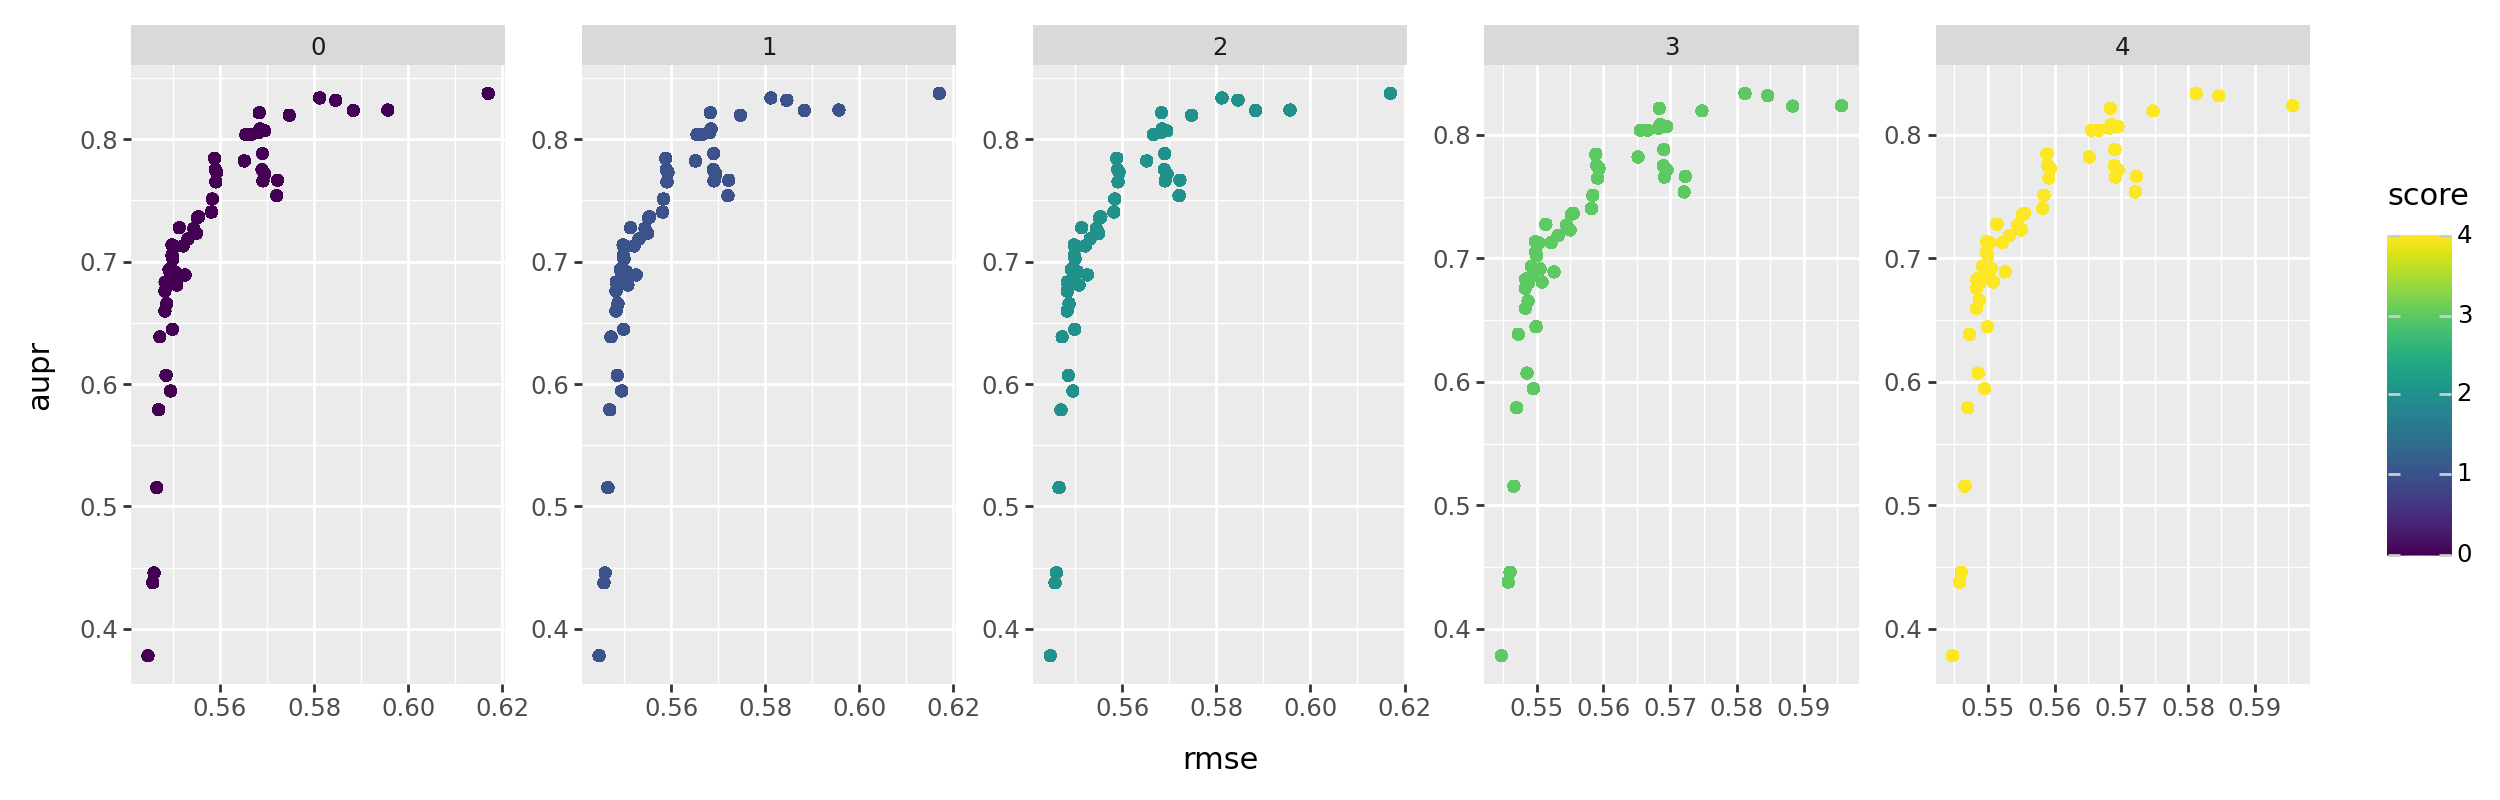

In [41]:
(
    p9.ggplot(df, p9.aes(x="rmse", y="aupr", color="score"))
    + p9.geom_point()
    + p9.facet_wrap("score", scales="free", ncol=5)
    + p9.theme(figure_size=(12.5, 4))
)

/data/m015k/miniconda3/envs/prismo/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 522 rows containing missing values.
/data/m015k/miniconda3/envs/prismo/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_text : Removed 3825 rows containing missing values.
/data/m015k/miniconda3/envs/prismo/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_segment : Removed 3825 rows containing missing values.


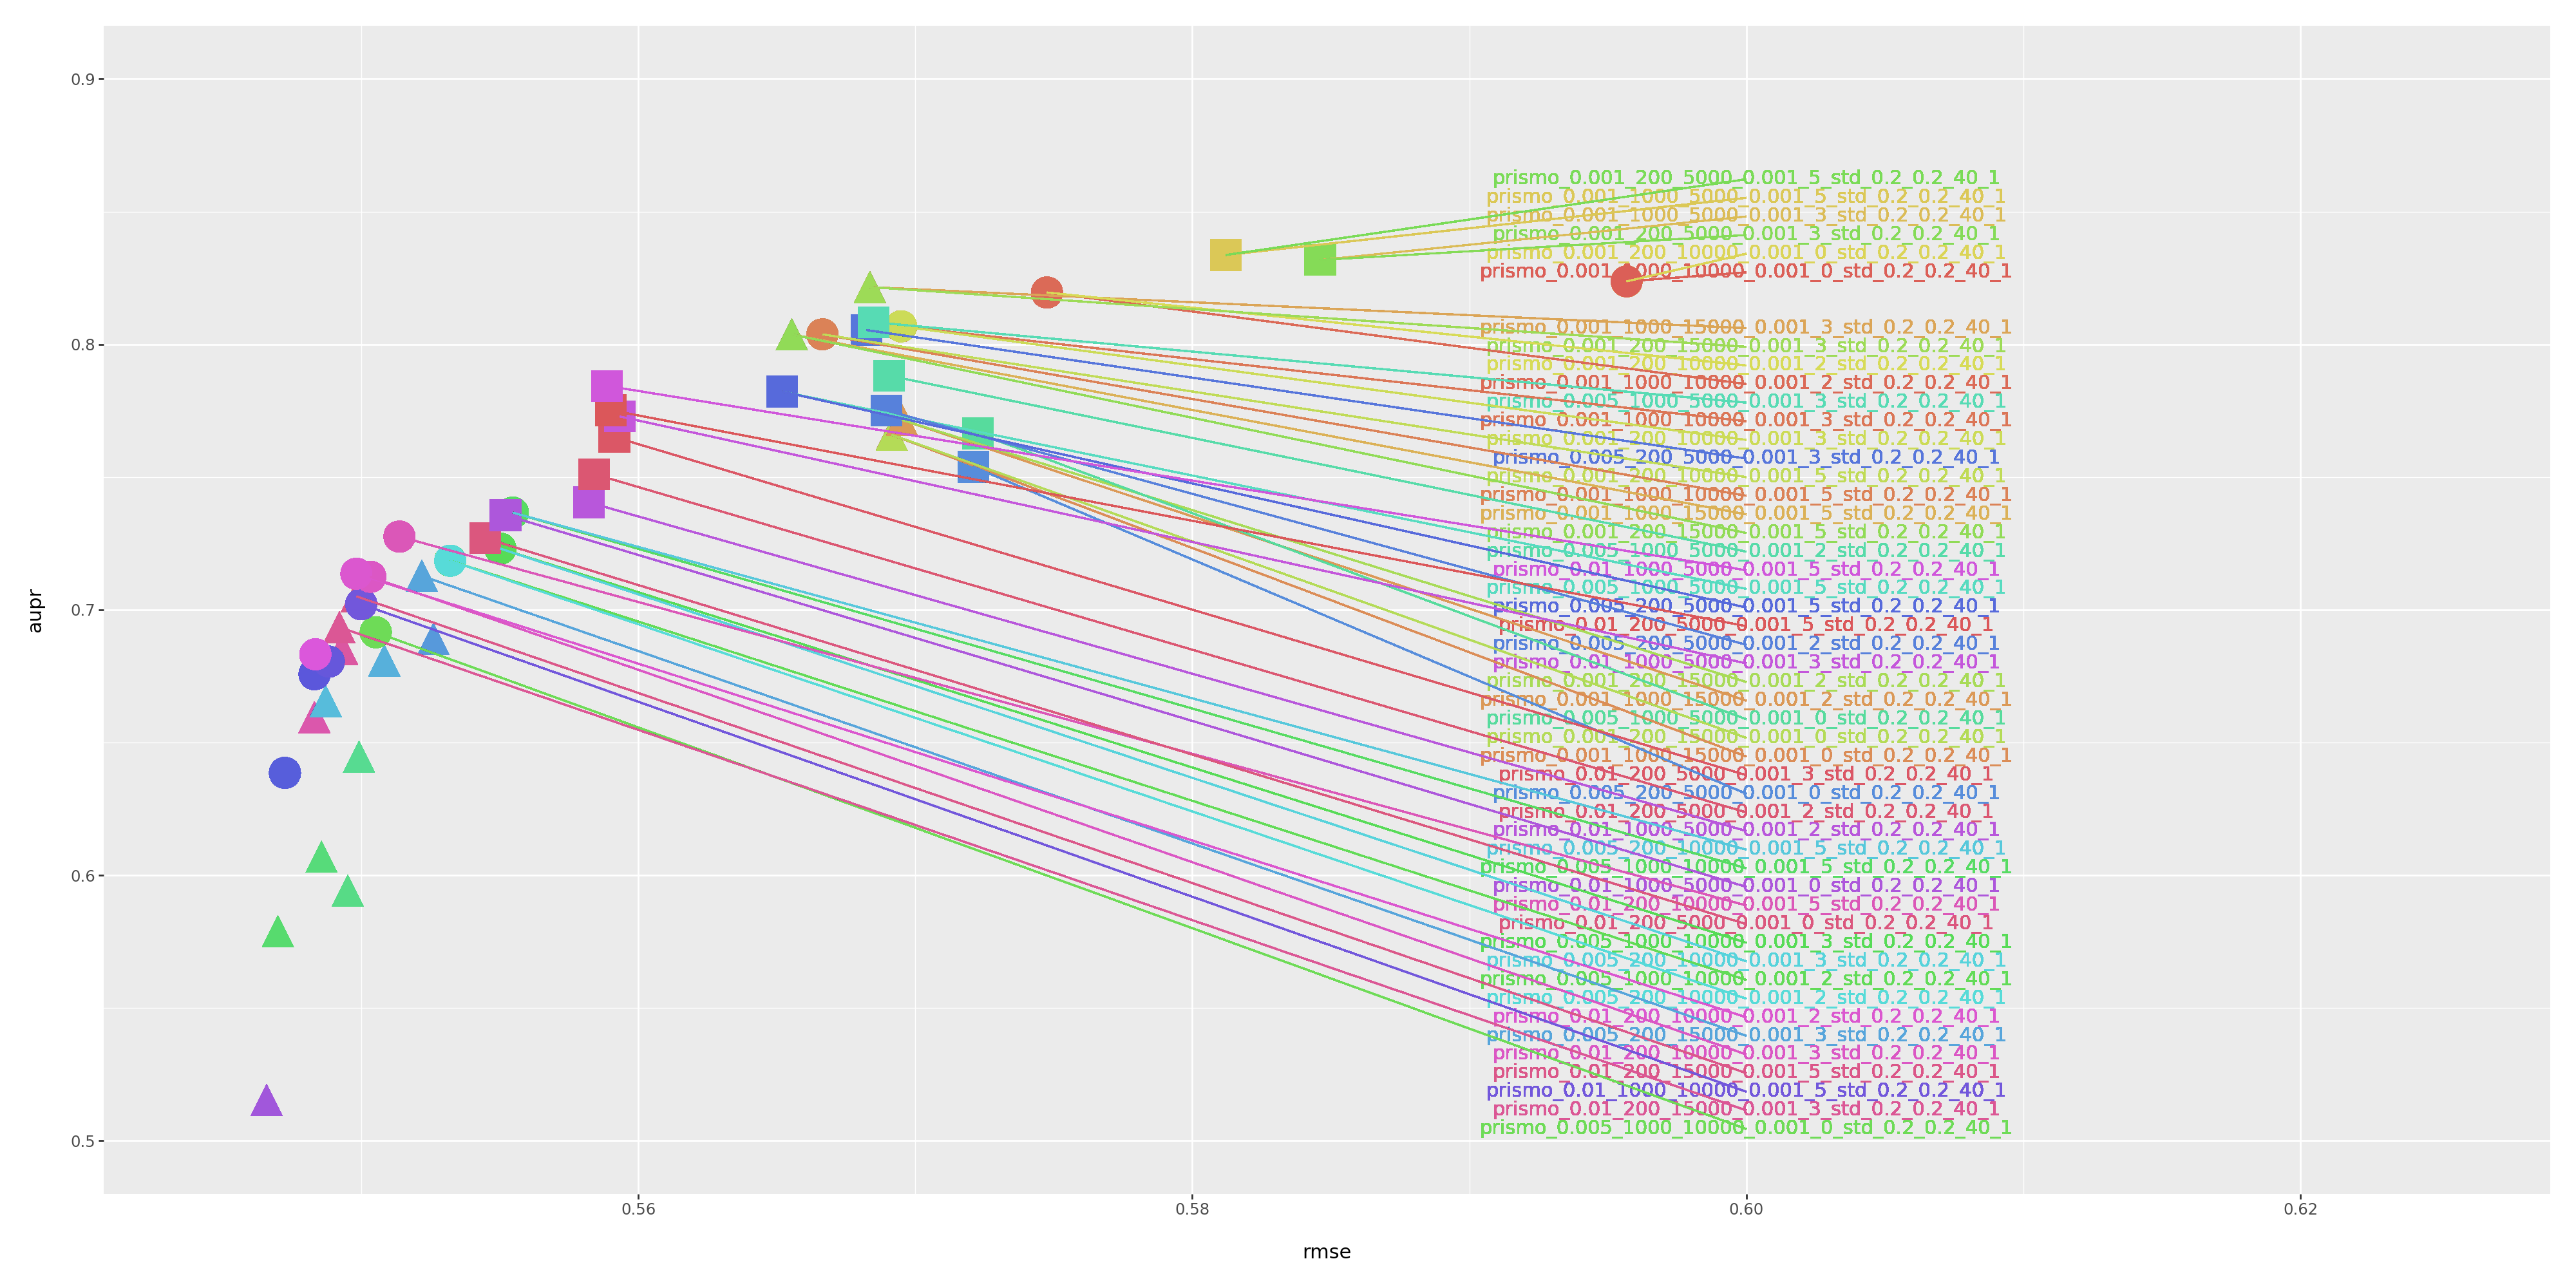

In [42]:
# df = df.loc[df["rmse"] < 0.56]
df = df.sort_values(by="aupr")
df["id"] = range(len(df))
df["rank"] = df["aupr"].rank(ascending=False, method="min")
mapping = list(df["model"].unique())
mapping = {mapping[i]: i for i in range(len(mapping))}
df["x_text_pos"] = 0.6
y_max = df["aupr"].max()
y_min = df["aupr"].min()
df["y_text_pos"] = (
    df["model"].map(mapping) * 1.1 * (y_max - y_min) / len(mapping) + y_min
)
df["max_epochs"] = df["max_epochs"].astype(str)

pointsize = 2
(
    p9.ggplot(
        df[df.score == 4], p9.aes(x="rmse", y="aupr", color="model", shape="max_epochs")
    )
    + p9.geom_point(stroke=0, size=10)
    + p9.theme(figure_size=(20, 10), legend_position="none")
    # Remove legend
    + p9.geom_text(
        data=df[df.score == 4],
        mapping=p9.aes(label="model", x="x_text_pos", y="y_text_pos", hadjust=10),
        # size=10,
        va="center",
        show_legend=False,
    )
    # Set x lim to 0.625
    + p9.scale_y_continuous(limits=(0.5, 0.9))
    + p9.scale_x_continuous(limits=(None, 0.625))
    # Draw line from left end of the text to the point
    + p9.geom_segment(
        data=df[df.score == 4],
        mapping=p9.aes(
            x="rmse",
            y="aupr",
            xend="x_text_pos",
            yend="y_text_pos",
        ),
        show_legend=False,
    )
)

In [27]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [ ]:
df.loc[df["model"] == "prismo_0.01_1000_5000_0.001_5_std_0.2_0.2_40_1"][["i", "j"]]

In [ ]:
# Plot score (y-axis) vs all other numeric variables (x-axis) for all files
import seaborn as sns
import matplotlib.pyplot as plt

files = [
    x
    for x in pathlib.Path("/data/m015k/prismo/benchmark/prismo/").rglob("*.csv")
    if "score" in str(x)
]
df = pd.concat([pd.read_csv(x) for x in files])
df = df.loc[df["metric"] == "aupr"]
df = df.drop(
    columns=[
        "metric",
        "model",
    ]
)

for column in df.columns:
    if column == "score":
        continue
    sns.boxplot(x=column, y="score", data=df, hue="lr", palette="Set1")
    plt.show()